# _`spaCy` Tweet Clean-up: Dec. 30, 2019_

**Useful Links**
- [NLP Essentials: Removing Stopwords and Performing Text Normalization using NLTK and spaCy in Python](https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/)
- [Tokenizing using Pandas and spaCy](https://www.reddit.com/r/learnpython/comments/78i7rh/tokenizing_using_pandas_and_spacy/)
- [Learn how to use spaCy for Natural Language Processing](https://medium.com/analytics-vidhya/learn-how-to-use-spacy-for-natural-language-processing-661805d3abae)
- [Python Remove Spaces from String](https://www.journaldev.com/23763/python-remove-spaces-from-string)
- [TEXT ANALYTICS WITH YELLOWBRICK: A TUTORIAL USING TWITTER DATA](https://www.districtdatalabs.com/text-analytics-with-yellowbrick)
- [Yellowbrick: Token Frequency Distribution](https://www.scikit-yb.org/en/latest/api/text/freqdist.html)
- [Yellowbrick: t-SNE Corpus Visualization](https://www.scikit-yb.org/en/latest/api/text/tsne.html)
- [sklearn: Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)
- [Yellowbrick Model Selection Tutorial](https://www.scikit-yb.org/en/latest/tutorial.html)
- [sklearn: Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
- [How to remove special characters in a string in Python 3?](https://stackoverflow.com/questions/51601256/how-to-remove-special-characters-in-a-string-in-python-3)

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import os
pd.set_option("display.max_columns", None)

dtype = {
    "id_str": str
}

# load in data specifically created for ML development 
df = pd.read_json("json-data/ml_sample20.json", orient="split")

In [3]:
df["full_text"]

0         San Francisco police detain 2 in dismembered b...
1         @PrimeVideo then call it a night!! https://t.c...
2         NYers: I'm trying to find a simple, furnished ...
3         Intention is not a thought in your mind, it is...
4         Trump has NOTHING to do with Russia. https://t...
                                ...                        
337761             https://t.co/Hm6YJc0HDE my man vodka lol
337762    Review @BryanBroaddus' full game notes after w...
337763      #politics State moves to limit greenhouse gases
337764    Being broken-hearted is like having broken rib...
337765    Why keep fighting Polio? Success has benefits ...
Name: full_text, Length: 337766, dtype: object

In [5]:
df["full_text"][0]

'San Francisco police detain 2 in dismembered body case  #crime'

## _Import `spaCy`_

In [24]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")
stops = STOP_WORDS

In [25]:
def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)

In [26]:
df["full_text"][:10].apply(normalize, lowercase=True, remove_stopwords=True)

0    san francisco police detain 2 dismembered body...
1    @primevideo -PRON- night ! ! https://t.co/rm4l...
2    nyer : -PRON- try find simple , furnished subl...
3    intention thought -PRON- mind , -PRON- power -...
4               trump russia . https://t.co/ap1bnhtsoy
5    man records passenger metro bus harass elderly...
6    # iamonfire end day , matter -PRON- score , -P...
7    golf : palmer laud great sport memorial servic...
8    open night : casellula @ alphabet city https:/...
9    http://t.co/ehmoirnehh ugh exercise feel dazed...
Name: full_text, dtype: object

In [29]:
doc[0]

San Francisco police detain 2 in dismembered body case  #crime

In [18]:
for token in doc:
    print(token.text)

San Francisco police detain 2 in dismembered body case  #crime
@PrimeVideo then call it a night!! https://t.co/Rm4LBWD98C
NYers: I'm trying to find a simple, furnished sublet for our nanny in the Upper West Side-ish area for a month or so.  Any leads?
Intention is not a thought in your mind, it is the power you employ to create your world. It is Intention that manifests your choices. -JCW
Trump has NOTHING to do with Russia. https://t.co/Ap1bNhtsOY
Man records passenger on METRO bus harassing elderly woman  #news
#IAMONFIRE At the end of the day, no matter how well you score, you’ve got to be able to stop people. – Eric Musselman
Golf: Palmer lauded by greats of the sport at memorial service  #sports
Opening Night: Casellula @ Alphabet City https://t.co/HZoTuQURit
http://t.co/EhmOiRnehh Ugh didn't exercise feel so dazed @centteach @Harrietmc_ @MakeM03 @ajegram_ @odysseyxxi @BellaCareBare @dancinjake


In [28]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [45]:
def joe_tokenizer(sentence):
    mytokens = parser(sentence)
    tokens = [token.lemma_.lower().strip() for token in mytokens if not token.is_punct | token.is_space | token.is_stop]
    return tokens

In [46]:
joe_tokenizer(df["clean_text"][0])

['san',
 'francisco',
 'police',
 'detain',
 '2',
 'dismembered',
 'body',
 'case',
 'crime']

In [47]:
spacy_tokenizer(df["clean_text"][0])

['san',
 'francisco',
 'police',
 'detain',
 '2',
 'dismembered',
 'body',
 'case',
 'crime']

In [58]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer = joe_tokenizer, ngram_range=(1,1))

In [59]:
from yellowbrick.text import FreqDistVisualizer

In [60]:
%%time

docs = vectorizer.fit_transform(df["clean_text"])

CPU times: user 49.6 s, sys: 276 ms, total: 49.9 s
Wall time: 50 s


In [67]:
visualizer = FreqDistVisualizer(features=vectorizer.get_feature_names(), n=40)

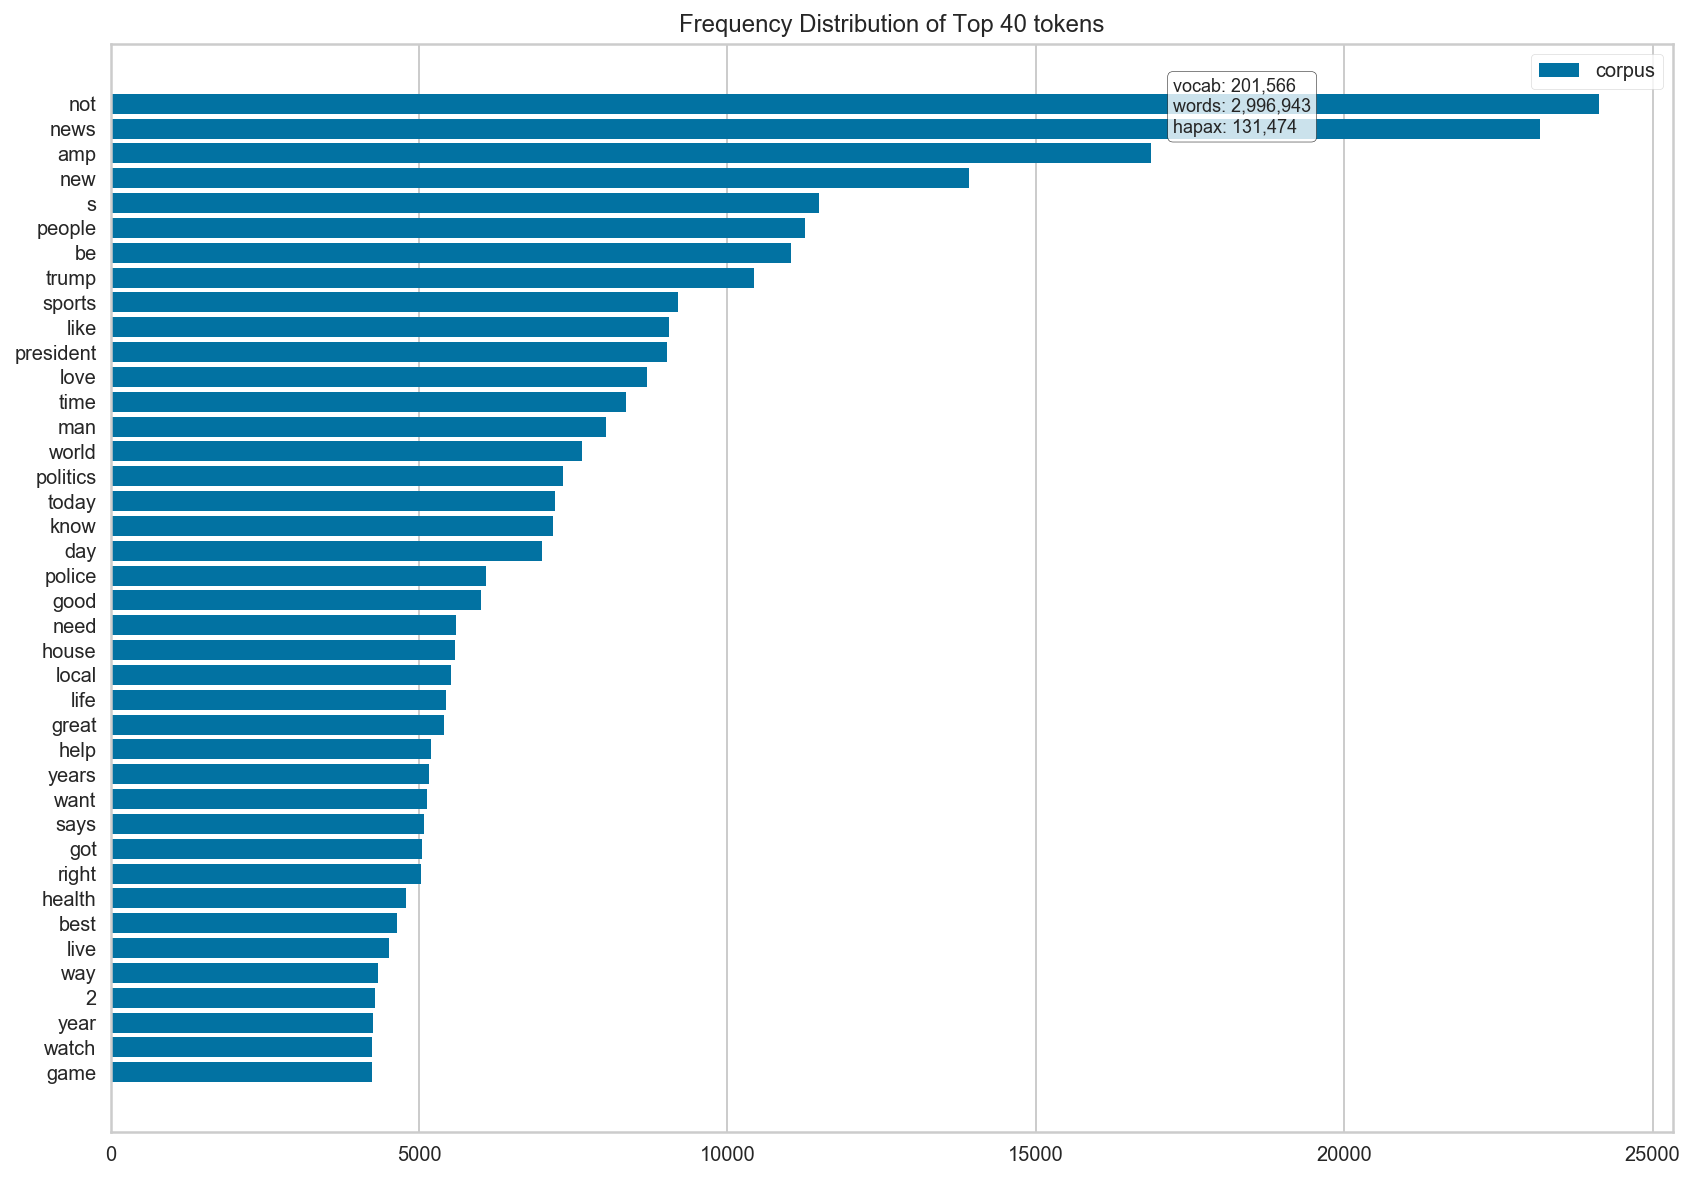

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,10))
visualizer.fit(docs)
visualizer.poof();

In [80]:
amp = df[df["clean_text"].str.contains("amp")]

In [81]:
amp.reset_index(drop=True, inplace=True)

In [82]:
amp.loc[0, "clean_text"]

'The Warriors finally played their game of Pace amp Space and thats why they ended up winning the game'

In [94]:
amp["clean_text"].str.replace("amp", "and").replace(" ", "").loc[0]

'The Warriors finally played their game of Pace and Space and thats why they ended up winning the game'

In [95]:
import re

string = amp["clean_text"][0].replace("amp", "and")

re.sub(r"\s+", " ", string)

'The Warriors finally played their game of Pace and Space and thats why they ended up winning the game'

In [96]:
amp["full_text"][0]

'The Warriors finally played their game of "Pace &amp; Space" and that\'s why they ended up winning the game.'

## _Clean text_

In [112]:
#!python -m spacy download en_core_web_md

In [113]:
import pandas as pd
import os
pd.set_option("display.max_columns", None)

dtype = {
    "id_str": str
}

# load in data specifically created for ML development 
df = pd.read_json("json-data/ml_sample20.json", orient="split")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337766 entries, 0 to 337765
Data columns (total 10 columns):
id_str            337766 non-null int64
screen_name       337766 non-null object
created_at        337766 non-null datetime64[ns]
lang              337766 non-null object
source            337766 non-null object
retweet_count     337766 non-null int64
favorite_count    337766 non-null int64
full_text         337766 non-null object
clean_text        337766 non-null object
label             337766 non-null object
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 28.3+ MB


In [118]:
from string import punctuation

# Create our list of punctuation marks
punctuations = punctuation

# Create our list of stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

In [131]:
def test_clean1(text):
    #text = re.sub("[^a-z\s]", "", text)
    text = re.sub("amp", "and", text)
    #text = re.sub(r"\s+", " ", text)
    return text

In [132]:
df["test_clean1"] = df["clean_text"].apply(lambda x: test_clean1(x))

In [133]:
df["test_clean1"]

0         San Francisco police detain 2 in dismembered b...
1                           PrimeVideo then call it a night
2         NYers Im trying to find a simple furnished sub...
3         Intention is not a thought in your mind it is ...
4                       Trump has NOTHING to do with Russia
                                ...                        
337761                                     my man vodka lol
337762    Review BryanBroaddus full game notes after wat...
337763       politics State moves to limit greenhouse gases
337764    Being brokenhearted is like having broken ribs...
337765    Why keep fighting Polio Success has benefits f...
Name: test_clean1, Length: 337766, dtype: object

In [166]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = spacy.lang.en.stop_words.STOP_WORDS

df["remove_stopwords"] = df["test_clean1"].apply(lambda x: " ".join(word for word in x.lower().split() if word not in stop_words))

In [167]:
df["remove_stopwords"]

0         san francisco police detain 2 dismembered body...
1                                          primevideo night
2         nyers im trying find simple furnished sublet n...
3         intention thought mind power employ create wor...
4                                              trump russia
                                ...                        
337761                                        man vodka lol
337762    review bryanbroaddus game notes watching film ...
337763          politics state moves limit greenhouse gases
337764    brokenhearted like having broken ribs outside ...
337765    fighting polio success benefits global health ...
Name: remove_stopwords, Length: 337766, dtype: object

In [168]:
vectorizer = CountVectorizer()
docs = vectorizer.fit_transform(df["remove_stopwords"])

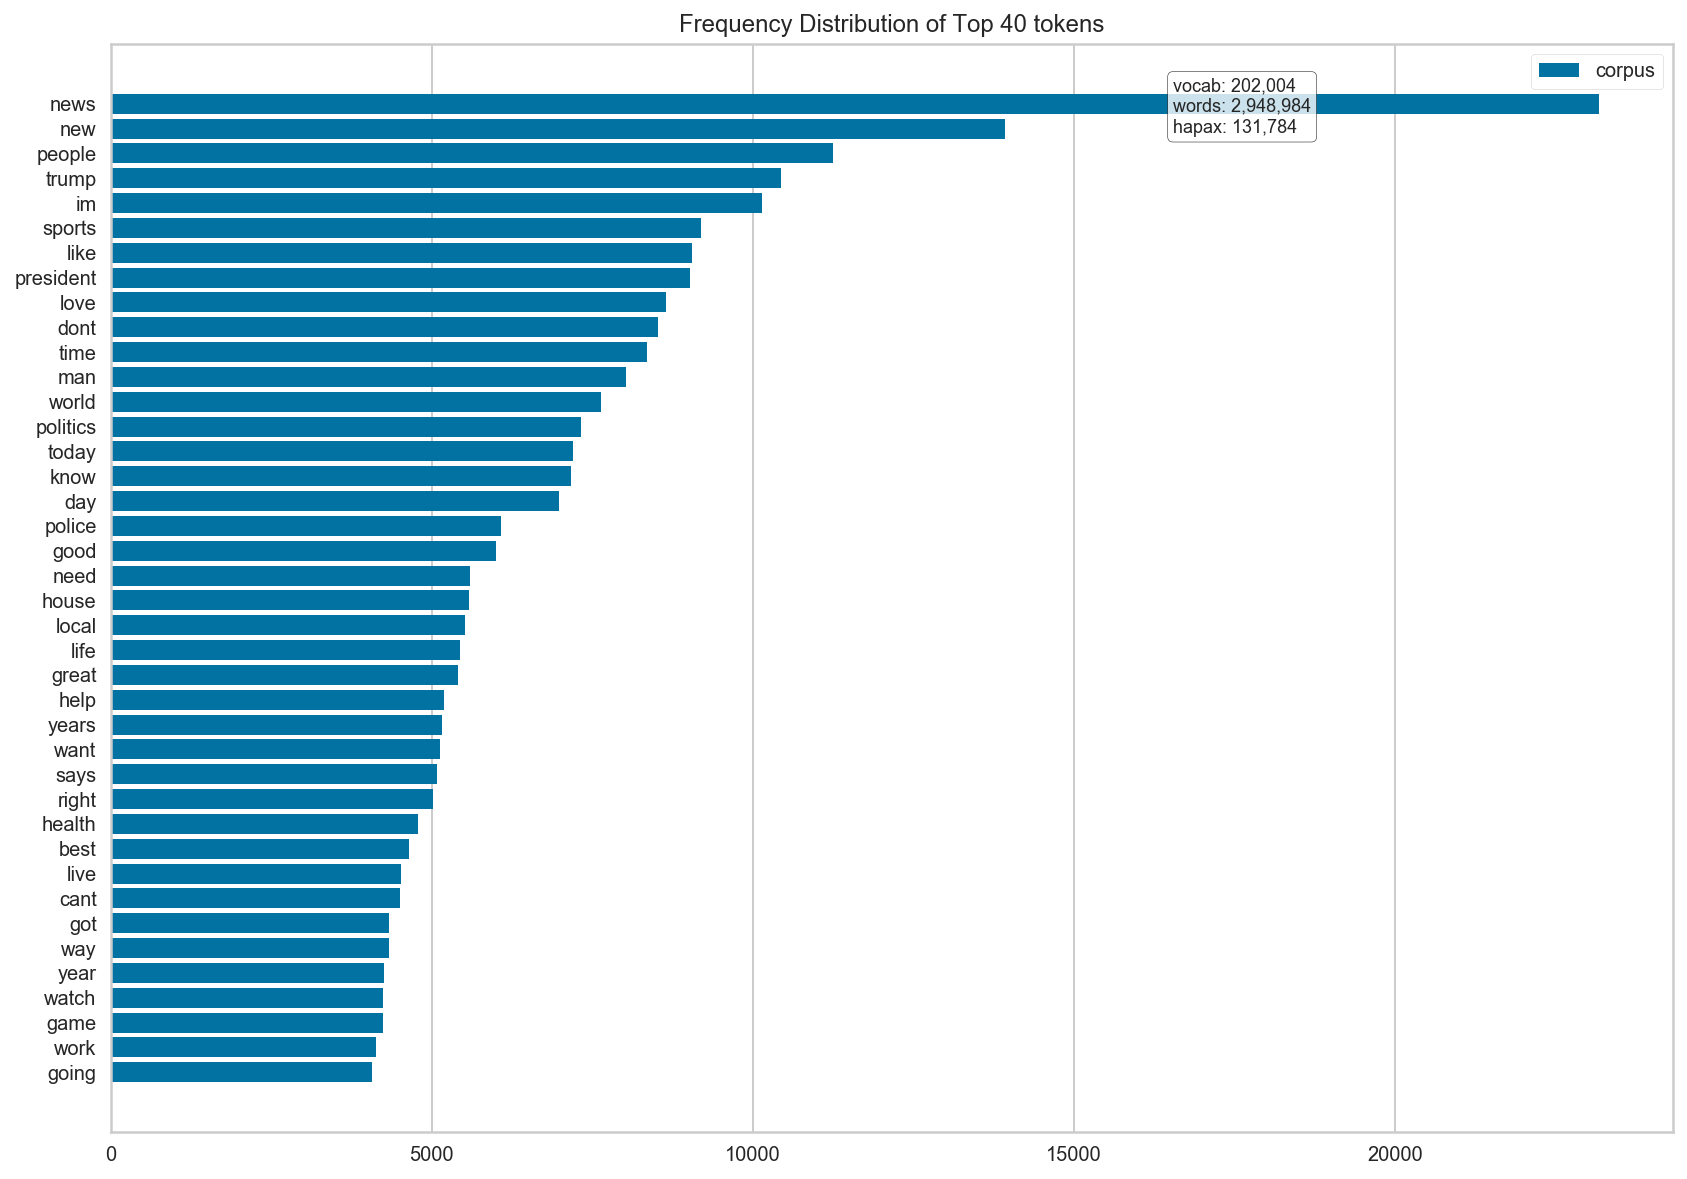

In [169]:
visualizer = FreqDistVisualizer(features=vectorizer.get_feature_names(), n=40)
plt.figure(figsize=(14,10))
visualizer.fit(docs)
visualizer.poof();

## _Creating Tokens With `spaCy`_

In [139]:
# Create our list of stopwords
nlp = spacy.load("en_core_web_sm")

document = nlp(df["remove_stopwords"][0])
print("Document: ", document)
print("Tokens: ", [token.text for token in document])

Document:  San Francisco police detain 2 dismembered body case crime
Tokens:  ['San', 'Francisco', 'police', 'detain', '2', 'dismembered', 'body', 'case', 'crime']


In [141]:
# take sample of df
sample = df.sample(frac=0.10, random_state=1)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33777 entries, 305421 to 180926
Data columns (total 13 columns):
id_str              33777 non-null int64
screen_name         33777 non-null object
created_at          33777 non-null datetime64[ns]
lang                33777 non-null object
source              33777 non-null object
retweet_count       33777 non-null int64
favorite_count      33777 non-null int64
full_text           33777 non-null object
clean_text          33777 non-null object
label               33777 non-null object
test_clean_text     33777 non-null object
test_clean1         33777 non-null object
remove_stopwords    33777 non-null object
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 3.6+ MB


In [142]:
import numpy as np

document = nlp.pipe(sample["remove_stopwords"])
tweets_vector = np.array([tweet.vector for tweet in document])
print(tweets_vector.shape)

(33777,)


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

X = tweets_vector
y = LabelEncoder().fit_transform(sample["label"])
#y = sample["label"]

In [153]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.3,
    random_state=1
)

In [154]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/jai/anaconda3/envs/disinformation/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: setting an array element with a sequence.

In [123]:
df["test_clean_text"] = df["clean_text"].apply(lambda x: re.sub(r"[^a-z\s]|amp|\s+", " ", x.lower()))

In [124]:
df["test_clean_text"]

0         san francisco police detain   in dismembered b...
1                           primevideo then call it a night
2         nyers im trying to find a simple furnished sub...
3         intention is not a thought in your mind it is ...
4                       trump has nothing to do with russia
                                ...                        
337761                                     my man vodka lol
337762    review bryanbroaddus full game notes after wat...
337763       politics state moves to limit greenhouse gases
337764    being brokenhearted is like having broken ribs...
337765    why keep fighting polio success has benefits f...
Name: test_clean_text, Length: 337766, dtype: object

In [105]:
%%time

def text_clean(text):
    string = text.replace("amp", "and")
    return re.sub(r"\s+", " ", string)

df["clean_text"] = df["clean_text"].copy().apply(lambda x: text_clean(x))

CPU times: user 2.49 s, sys: 45.3 ms, total: 2.53 s
Wall time: 3.45 s


In [107]:
vectorizer = CountVectorizer(tokenizer = joe_tokenizer, ngram_range=(1,1))
docs = vectorizer.fit_transform(df["clean_text"])

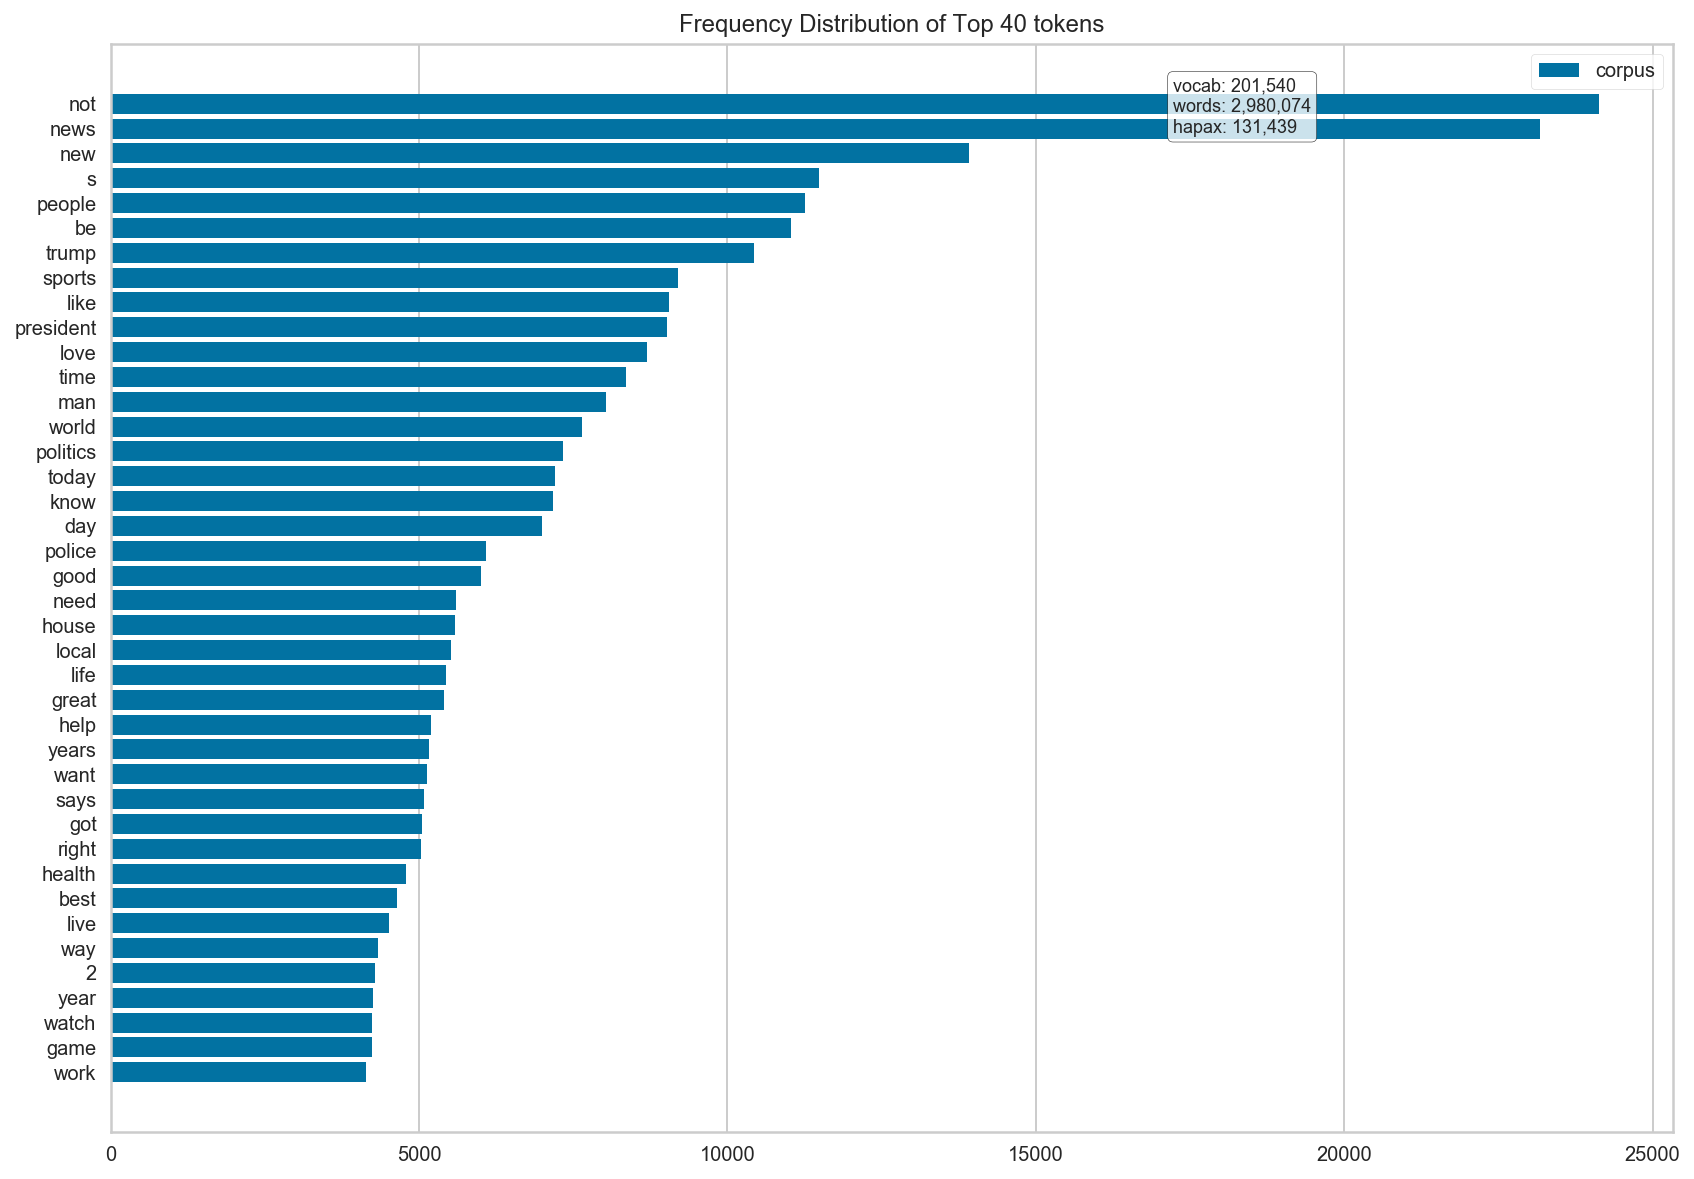

In [108]:
visualizer = FreqDistVisualizer(features=vectorizer.get_feature_names(), n=40)
plt.figure(figsize=(14,10))
visualizer.fit(docs)
visualizer.poof();